In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest

C:\Users\antho\Anaconda3\lib\site-packages\backtesting\_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [18]:
sp_df = yf.download('^GSPC', 
                      start='2011-09-13', 
                      end='2019-12-13', 
                      progress=False,interval='1d')
ohlc = sp_df.iloc[:,:4]
ohlc

,Open,High,Low,Close
Date,,,,
2011-09-12,1153.500000,1162.520020,1136.069946,1162.270020
2011-09-13,1162.589966,1176.410034,1157.439941,1172.869995
2011-09-14,1173.319946,1202.380005,1162.729980,1188.680054
2011-09-15,1189.439941,1209.109985,1189.439941,1209.109985
2011-09-16,1209.209961,1220.060059,1204.459961,1216.010010
...,...,...,...,...
2019-12-06,3134.620117,3150.600098,3134.620117,3145.909912
2019-12-09,3141.860107,3148.870117,3135.459961,3135.959961
2019-12-10,3135.360107,3142.120117,3126.090088,3132.520020


# Simple Moving Average

In [19]:
def SMA(values,n):
    return pd.Series(values).rolling(n).mean()

In [20]:
class SmaCross(Strategy):
    
    n1 = 50
    n2 = 200
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [21]:
bt = Backtest(ohlc,SmaCross,cash=10000)

In [22]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          43.4783
Equity Final [$]                      10840.5
Equity Peak [$]                       12015.7
Return [%]                             8.4046
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                    -22.0962
Avg. Drawdown [%]                    -3.38424
Max. Drawdown Duration      753 days 00:00:00
Avg. Drawdown Duration       81 days 00:00:00
# Trades                                    5
Win Rate [%]                               20
Best Trade [%]                        25.8651
Worst Trade [%]                      -9.04649
Avg. Trade [%]                       0.374505
Max. Trade Duration         958 days 00:00:00
Avg. Trade Duration         262 days 00:00:00
Expectancy [%]                        9.97153
SQN                                -0.0645089
Sharpe Ratio                      

In [23]:
bt.plot()

In [24]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,200,9),n2=range(1,200,9),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

In [25]:
data

Start                         2011-09-12 00:00:00
End                           2019-12-12 00:00:00
Duration                       3013 days 00:00:00
Exposure [%]                              79.9535
Equity Final [$]                          23067.4
Equity Peak [$]                           24074.1
Return [%]                                130.674
Buy & Hold Return [%]                     172.619
Max. Drawdown [%]                        -16.4466
Avg. Drawdown [%]                        -1.72526
Max. Drawdown Duration          349 days 00:00:00
Avg. Drawdown Duration           21 days 00:00:00
# Trades                                       13
Win Rate [%]                              69.2308
Best Trade [%]                            34.1957
Worst Trade [%]                           -4.8156
Avg. Trade [%]                            6.80823
Max. Trade Duration             990 days 00:00:00
Avg. Trade Duration             186 days 00:00:00
Expectancy [%]                            8.22894


In [26]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,10,19,28,37,46,55,64,73,82,91,...,118,127,136,145,154,163,172,181,190,199
n1,,,,,,,,,,,,,,,,,,,,,
1,-0.031579,-0.083064,-0.013273,-0.107304,-0.178618,-0.203972,-0.086004,-0.131737,-0.131254,-0.157673,...,-0.102578,-0.040514,-0.075753,-0.045806,-0.030974,-0.019553,0.017777,0.035702,0.062697,0.085800
10,NaN,-0.142018,-0.067433,-0.055363,-0.015115,-0.051476,-0.021616,0.012307,0.064169,0.034398,...,0.072636,0.064985,0.043177,0.069954,0.140853,0.184345,0.192847,0.227590,0.279433,0.301875
19,NaN,NaN,0.079346,-0.013379,0.028139,0.142655,0.099283,-0.075301,0.007489,0.005025,...,0.022299,0.131476,0.227670,0.226518,0.268871,0.241312,0.123523,0.209194,0.214231,0.191548
28,NaN,NaN,NaN,0.003750,-0.034075,0.010157,-0.008528,0.045434,-0.008546,-0.021940,...,0.034100,0.168294,0.223699,0.265835,0.303522,0.268491,0.121746,0.137567,0.104250,0.108857
37,NaN,NaN,NaN,NaN,0.138571,0.087451,-0.015781,0.000738,0.135704,0.056380,...,0.181304,0.216002,0.268792,0.195843,0.172615,-0.012768,-0.002526,0.049668,0.000690,0.039356
46,NaN,NaN,NaN,NaN,NaN,-0.161535,-0.102365,0.088238,0.061889,0.065341,...,0.168539,0.146683,0.143716,0.118790,0.127867,0.211866,0.061045,0.134121,0.176906,0.186429
55,NaN,NaN,NaN,NaN,NaN,NaN,0.085666,0.128898,-0.003867,-0.003357,...,0.144089,0.237121,0.303763,0.197133,0.139749,0.248472,-0.041655,-0.051489,-0.007800,0.018865
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097044,-0.066199,0.031809,...,0.064894,0.211627,0.130555,0.118552,0.245111,0.269648,0.102180,0.040243,-0.024010,-0.020873
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.167888,-0.020587,...,0.166106,0.163600,0.165103,0.215546,0.212457,0.255307,-0.034408,-0.191593,-0.295814,-0.301128


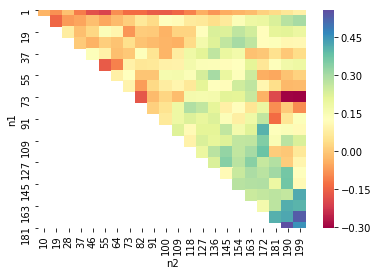

In [27]:
sns.heatmap(hmap, cmap='Spectral')

In [28]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

In [29]:
import scipy.interpolate as interp
import numpy as np

In [30]:
px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until


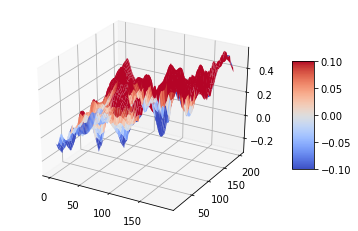

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Exponential Moving Average

In [33]:
def EMA(val,n):
    res = pd.Series(val).copy()
    return res.ewm(span=n,adjust=False).mean()

In [34]:
class EmaCross(Strategy):
    
    n1 = 37
    n2 = 46
    
    def init(self):
        # Precompute two moving averages
        self.ema1 = self.I(EMA, self.data.Close, self.n1)
        self.ema2 = self.I(EMA, self.data.Close, self.n2)
        
    def next(self):
        # If sma1 crosses above ema2, buy the asset
        if crossover(self.ema1, self.ema2):
            self.buy()

        # Else, if ema1 crosses below ema2, sell it
        elif crossover(self.ema2, self.ema1):
            self.sell()

In [35]:
bt = Backtest(ohlc,EmaCross,cash=10000)

In [36]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          96.0504
Equity Final [$]                      12547.5
Equity Peak [$]                       12957.3
Return [%]                            25.4748
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                     -23.287
Avg. Drawdown [%]                    -2.97729
Max. Drawdown Duration     1205 days 00:00:00
Avg. Drawdown Duration       74 days 00:00:00
# Trades                                   23
Win Rate [%]                          39.1304
Best Trade [%]                        29.9705
Worst Trade [%]                      -10.2289
Avg. Trade [%]                        1.04823
Max. Trade Duration         664 days 00:00:00
Avg. Trade Duration         126 days 00:00:00
Expectancy [%]                         5.5142
SQN                                  0.465058
Sharpe Ratio                      

In [37]:
bt.plot()

In [38]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,200,9),n2=range(1,200,9),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

In [39]:
data

Start                         2011-09-12 00:00:00
End                           2019-12-12 00:00:00
Duration                       3013 days 00:00:00
Exposure [%]                              89.0143
Equity Final [$]                          18642.6
Equity Peak [$]                           18642.6
Return [%]                                86.4262
Buy & Hold Return [%]                     172.619
Max. Drawdown [%]                        -25.6146
Avg. Drawdown [%]                        -2.06114
Max. Drawdown Duration          942 days 00:00:00
Avg. Drawdown Duration           32 days 00:00:00
# Trades                                        5
Win Rate [%]                                   40
Best Trade [%]                             55.779
Worst Trade [%]                          -11.6358
Avg. Trade [%]                            12.5047
Max. Trade Duration            1563 days 00:00:00
Avg. Trade Duration             537 days 00:00:00
Expectancy [%]                            20.8124


In [40]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,10,19,28,37,46,55,64,73,82,91,...,118,127,136,145,154,163,172,181,190,199
n1,,,,,,,,,,,,,,,,,,,,,
1,-0.039007,-0.046433,-0.108247,-0.130098,-0.179622,-0.176323,-0.215665,-0.181914,-0.201081,-0.156213,...,-0.041018,-0.015134,-0.026331,-0.012628,-0.006714,0.004769,0.016497,0.039821,0.014196,0.047293
10,NaN,-0.148018,-0.175464,-0.237827,-0.103196,-0.082469,-0.018038,0.081783,0.155395,0.177340,...,0.091387,0.142661,0.155567,0.126693,0.199057,0.216396,0.233206,0.289072,0.296168,0.303208
19,NaN,NaN,-0.049964,-0.115876,0.089010,0.137005,0.200774,0.167014,0.187543,0.116014,...,0.000944,0.177266,0.228238,0.256520,0.346024,0.312835,0.294367,0.294367,0.269119,0.264499
28,NaN,NaN,NaN,0.114361,0.163734,0.179173,0.115035,0.074925,0.011566,0.050199,...,0.253201,0.318431,0.283684,0.312460,0.280695,0.292272,0.231851,0.243060,0.259328,0.227782
37,NaN,NaN,NaN,NaN,0.119843,0.078408,0.004626,0.016307,0.068660,0.120359,...,0.279941,0.296306,0.291172,0.300854,0.263704,0.279991,0.241903,0.241903,0.271781,0.285992
46,NaN,NaN,NaN,NaN,NaN,-0.021679,0.054682,0.162306,0.158713,0.204880,...,0.259594,0.301777,0.282717,0.256123,0.258447,0.295472,0.300352,0.293897,0.250892,0.295561
55,NaN,NaN,NaN,NaN,NaN,NaN,0.159309,0.203372,0.310385,0.285747,...,0.286133,0.276030,0.274814,0.296008,0.290699,0.317187,0.306345,0.299099,0.276042,0.282778
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290516,0.295895,0.316261,...,0.261392,0.275669,0.274056,0.312461,0.301263,0.282302,0.268774,0.297467,0.267833,0.245200
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327228,0.308051,...,0.297255,0.324147,0.371223,0.310836,0.272562,0.289320,0.276159,0.245957,0.245066,0.223335


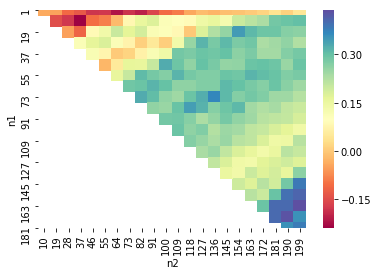

In [41]:
sns.heatmap(hmap, cmap='Spectral')

In [42]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

In [43]:
px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until


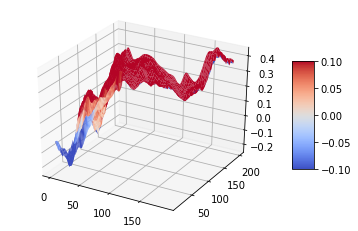

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Double Exponential Moving Average

In [45]:
def DEMA(val,n):
    exp1 = EMA(val,n)
    exp2 = EMA(exp1,n)
    return 2*exp1 - exp2

In [46]:
class DemaCross(Strategy):
    
    n1 = 37
    n2 = 46
    
    def init(self):
        # Precompute two moving averages
        self.dema1 = self.I(DEMA, self.data.Close, self.n1)
        self.dema2 = self.I(DEMA, self.data.Close, self.n2)
        
    def next(self):
        # If sma1 crosses above ema2, buy the asset
        if crossover(self.dema1, self.dema2):
            self.buy()

        # Else, if ema1 crosses below ema2, sell it
        elif crossover(self.dema2, self.dema1):
            self.sell()

In [47]:
bt = Backtest(ohlc,DemaCross,cash=10000)

In [48]:
bt.run()

Start                     2011-09-12 00:00:00
End                       2019-12-12 00:00:00
Duration                   3013 days 00:00:00
Exposure [%]                          97.6435
Equity Final [$]                      7132.61
Equity Peak [$]                       10282.7
Return [%]                           -28.6739
Buy & Hold Return [%]                 172.619
Max. Drawdown [%]                    -39.8674
Avg. Drawdown [%]                    -39.8674
Max. Drawdown Duration     2992 days 00:00:00
Avg. Drawdown Duration     2992 days 00:00:00
# Trades                                   63
Win Rate [%]                          28.5714
Best Trade [%]                         9.4911
Worst Trade [%]                      -8.54357
Avg. Trade [%]                      -0.553061
Max. Trade Duration         146 days 00:00:00
Avg. Trade Duration          47 days 00:00:00
Expectancy [%]                        3.07036
SQN                                  -1.38335
Sharpe Ratio                      

In [49]:
bt.plot()

In [50]:
data, heat = bt.optimize('Sharpe Ratio',n1=range(1,200,9),n2=range(1,200,9),constraint=lambda p: p.n1<p.n2,return_heatmap=True)

data

Start                          2011-09-12 00:00:00
End                            2019-12-12 00:00:00
Duration                        3013 days 00:00:00
Exposure [%]                               91.8354
Equity Final [$]                           14843.5
Equity Peak [$]                            16938.9
Return [%]                                 48.4351
Buy & Hold Return [%]                      172.619
Max. Drawdown [%]                         -24.0996
Avg. Drawdown [%]                         -2.12543
Max. Drawdown Duration           685 days 00:00:00
Avg. Drawdown Duration            38 days 00:00:00
# Trades                                        11
Win Rate [%]                               36.3636
Best Trade [%]                             29.0891
Worst Trade [%]                           -6.94282
Avg. Trade [%]                             3.66584
Max. Trade Duration              685 days 00:00:00
Avg. Trade Duration              252 days 00:00:00
Expectancy [%]                 

In [51]:
heat.sort_values()
hmap = heat.groupby(['n1','n2']).mean().unstack()
hmap

n2,10,19,28,37,46,55,64,73,82,91,...,118,127,136,145,154,163,172,181,190,199
n1,,,,,,,,,,,,,,,,,,,,,
1,-0.016352,0.018708,-0.030516,-0.050263,-0.059599,-0.043705,-0.042715,-0.063313,-0.059507,-0.079508,...,-0.167429,-0.188535,-0.212859,-0.220688,-0.223837,-0.243838,-0.241505,-0.235330,-0.249572,-0.251205
10,NaN,-0.048843,-0.093491,-0.037054,-0.045660,-0.072554,-0.075136,-0.069223,-0.149382,-0.169066,...,-0.201861,-0.217594,-0.187281,-0.228809,-0.263129,-0.286239,-0.282948,-0.268552,-0.274348,-0.265755
19,NaN,NaN,-0.052861,-0.043089,-0.167373,-0.187656,-0.159151,-0.214848,-0.281965,-0.280387,...,-0.334411,-0.358349,-0.376061,-0.385873,-0.337995,-0.357025,-0.350587,-0.335891,-0.272161,-0.256115
28,NaN,NaN,NaN,-0.166931,-0.142119,-0.209258,-0.249594,-0.255072,-0.275132,-0.265489,...,-0.236163,-0.274850,-0.311299,-0.278295,-0.277723,-0.334124,-0.329911,-0.319131,-0.307239,-0.316783
37,NaN,NaN,NaN,NaN,-0.145583,-0.260006,-0.265913,-0.206257,-0.189697,-0.221699,...,-0.275898,-0.352348,-0.323904,-0.338820,-0.287280,-0.272974,-0.273374,-0.280085,-0.334998,-0.321961
46,NaN,NaN,NaN,NaN,NaN,-0.235163,-0.233193,-0.212243,-0.218189,-0.285668,...,-0.328828,-0.309440,-0.290425,-0.273549,-0.277311,-0.287772,-0.293180,-0.275027,-0.331223,-0.328231
55,NaN,NaN,NaN,NaN,NaN,NaN,-0.216926,-0.278179,-0.338308,-0.284980,...,-0.344434,-0.345000,-0.365804,-0.387736,-0.264700,-0.292103,-0.320203,-0.442397,-0.371788,-0.371592
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.339522,-0.295609,-0.354497,...,-0.387758,-0.431374,-0.316646,-0.305351,-0.405118,-0.365821,-0.393252,-0.378933,-0.423168,-0.387103
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.382610,-0.303563,...,-0.320729,-0.314620,-0.343018,-0.367405,-0.316218,-0.388202,-0.405201,-0.406350,-0.413143,-0.341637


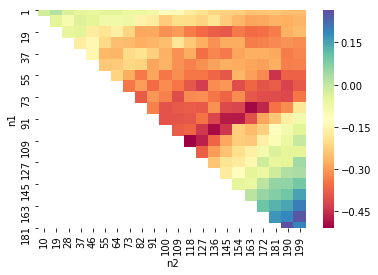

In [52]:
sns.heatmap(hmap, cmap='Spectral')

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()


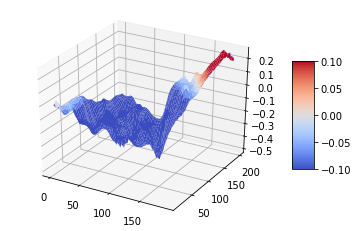

In [53]:
tr = hmap.stack()

n1 = [i[0] for i in tr.index]
n2 = [i[1] for i in tr.index]

val = []
for (i,j) in zip(n1,n2):
    if i<j:
        val.append(tr.loc[i,j])

px, py = np.meshgrid(np.linspace(np.min(n1),np.max(n1),100),np.linspace(np.min(n2),np.max(n2),100))
pz = interp.griddata((n1,n2),val,(px,py),method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(px,py,pz,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()